Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

Min-Max scaling, also known as normalization, is a data preprocessing technique used to transform features to a fixed range, typically [0, 1]. This is particularly useful in machine learning algorithms that are sensitive to the scale of data, such as gradient descent-based methods.
How It Works
Min-Max scaling transforms each feature individually according to the following formula:
Xscaled​=Xmax​−Xmin​X−Xmin​​
Where:

( X ) is the original value.
( X_{\text{min}} ) is the minimum value of the feature.
( X_{\text{max}} ) is the maximum value of the feature.
( X_{\text{scaled}} ) is the scaled value.

Application
Min-Max scaling is commonly used in:

Neural Networks: Ensuring that input features are on a similar scale can improve the convergence speed of gradient descent.
K-Nearest Neighbors (KNN): Distance-based algorithms like KNN can be significantly affected by the scale of the data.

Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

Unit Vector Technique
The Unit Vector technique scales each feature vector to have a unit norm (length of 1). This is done by dividing each element of the vector by the Euclidean norm (L2 norm) of the vector. This technique is particularly useful when you want to ensure that the magnitude of the feature vector is 1, which can be beneficial in algorithms that rely on the magnitude of vectors, such as K-Nearest Neighbors (KNN).
Formula:
xscaled​=∥x∥x​
where (|x|) is the Euclidean norm of the vector (x).

Differences
Unit Vector Scaling ensures that the feature vector has a unit norm, which is useful for algorithms that depend on the magnitude of vectors.
Min-Max Scaling ensures that the features are within a specific range, typically [0, 1], which is useful for ensuring that all features contribute equally to the model.

Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variability (information) as possible. It transforms the original variables into a new set of uncorrelated variables called principal components, which are ordered by the amount of variance they capture from the data.

How PCA Works
Standardize the Data: Ensure each feature has a mean of 0 and a standard deviation of 1.
Compute the Covariance Matrix: This matrix shows how the variables in the dataset vary together.
Calculate the Eigenvalues and Eigenvectors: These are derived from the covariance matrix. Eigenvectors determine the direction of the new feature space, while eigenvalues determine their magnitude.
Sort Eigenvalues and Eigenvectors: Sort them in descending order of eigenvalues.
Select Principal Components: Choose the top k eigenvectors (principal components) that capture the most variance.
Transform the Data: Project the original data onto the new feature space defined by the selected principal components.

Benefits of PCA
Reduces Dimensionality: Simplifies the dataset by reducing the number of features.
Removes Multicollinearity: Transforms correlated features into uncorrelated principal components.
Improves Performance: Can enhance the performance of machine learning models by reducing overfitting and computational cost.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

print(pca_df.head())


   Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0


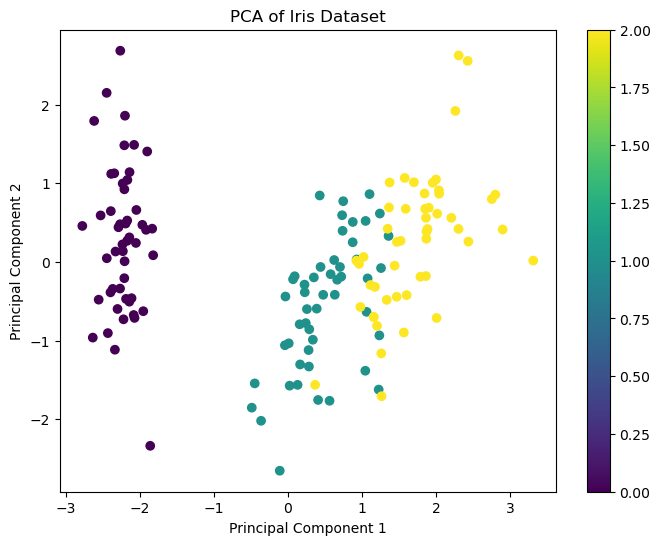

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Target'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()


Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

Relationship between PCA and Feature Extraction
Dimensionality Reduction: PCA reduces the number of features in a dataset while retaining as much variability (information) as possible. This helps in simplifying models, reducing computational cost, and mitigating the curse of dimensionality.
Feature Extraction: PCA transforms the original features into a new set of features called principal components. These components are linear combinations of the original features and are ordered by the amount of variance they capture from the data. The first few principal components usually capture most of the variance, making them effective new features.
Using PCA for Feature Extraction
Standardize the Data: Since PCA is affected by the scale of the data, it’s important to standardize the features to have a mean of 0 and a standard deviation of 1.
Compute the Covariance Matrix: This matrix represents the covariance (relationship) between different features.
Calculate Eigenvalues and Eigenvectors: These are derived from the covariance matrix. Eigenvectors determine the direction of the new feature space, and eigenvalues determine their magnitude.
Sort Eigenvalues and Select Principal Components: Sort the eigenvalues in descending order and select the top k eigenvalues and their corresponding eigenvectors. These eigenvectors form the principal components.
Transform the Data: Project the original data onto the new feature space defined by the selected principal components.

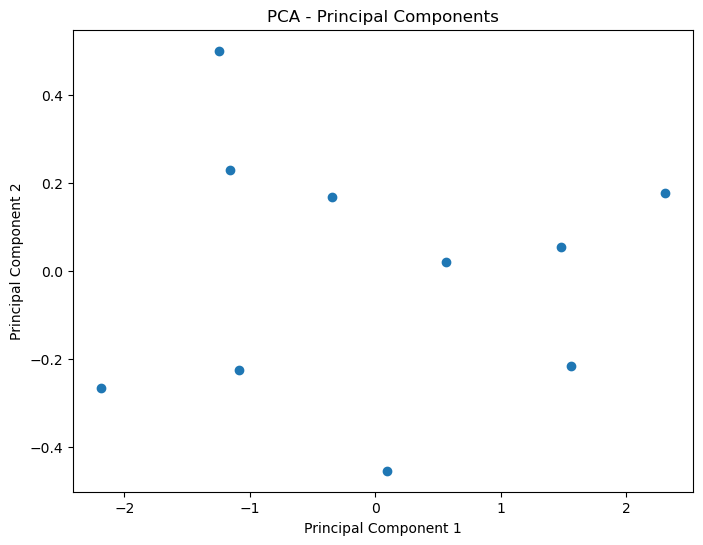

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample data
data = {
    'Feature1': [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1],
    'Feature2': [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]
}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Principal Components')
plt.show()


Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = {
    'price': [10, 20, 30, 40, 50],
    'rating': [1, 2, 3, 4, 5],
    'delivery_time': [30, 45, 20, 50, 35]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)


   price  rating  delivery_time
0   0.00    0.00       0.333333
1   0.25    0.25       0.833333
2   0.50    0.50       0.000000
3   0.75    0.75       1.000000
4   1.00    1.00       0.500000


Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



In [6]:
import numpy as np

covariance_matrix = np.cov(scaled_data.T)


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


In [8]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]


In [9]:
k = 10  # Number of principal components to keep
principal_components = sorted_eigenvectors[:, :k]


In [10]:
reduced_data = np.dot(scaled_data, principal_components)



Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample data
data =  [1, 5, 10, 15, 20]


# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

print(scaled_df)







          0
0  0.000000
1  0.210526
2  0.473684
3  0.736842
4  1.000000


Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

Standardize the Data: Ensure all features are on the same scale.
Compute the Covariance Matrix: This matrix shows how the features vary together.
Compute the Eigenvalues and Eigenvectors: These help determine the principal components.
Sort Eigenvalues and Eigenvectors: Sort them in descending order of eigenvalues.
Choose the Number of Principal Components: Decide how many components to retain based on the explained variance.
Choosing the Number of Principal Components
The number of principal components to retain depends on the amount of variance you want to capture. Typically, you aim to retain enough components to explain at least 95% of the variance in the data. Here’s a step-by-step approach:

Calculate the Explained Variance: Each principal component explains a certain amount of the total variance.
Cumulative Explained Variance: Sum the explained variance of the principal components cumulatively.
Determine the Threshold: Choose the number of components that cumulatively explain at least 95% of the variance.
Example Calculation
Let’s assume the explained variance ratios for the principal components are as follows:

PC1: 50%
PC2: 30%
PC3: 10%
PC4: 5%
PC5: 5%
Cumulatively, the explained variances are:

PC1: 50%
PC1 + PC2: 80%
PC1 + PC2 + PC3: 90%
PC1 + PC2 + PC3 + PC4: 95%
In this case, you would retain the first four principal components because they explain 95% of the variance.

Why Retain These Components?
Retaining these components ensures that you capture most of the information in the dataset while reducing dimensionality. This balance helps improve computational efficiency and can enhance model performance by removing noise and redundant features.